In [1]:
# Install TensorFlow
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import Model, Sequential, load_model
from tensorflow.keras.layers import Dense, Dropout, Flatten , Convolution2D, MaxPooling2D , Lambda, Conv2D, Activation,Concatenate, Input, BatchNormalization
from tensorflow.keras.optimizers import Adam , SGD , Adagrad
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, CSVLogger, ReduceLROnPlateau
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers , initializers
import tensorflow.keras.backend as K
from sklearn.preprocessing import StandardScaler
from joblib import dump, load


import numpy as np
from numpy import random
import matplotlib.pyplot as plt
# import autokeras as ak
import os 
import time
import importlib
import logging
from tqdm import tqdm

importlib.reload(logging)
logging.basicConfig(level = logging.INFO)

# limit GPU memory
gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#   # Restrict TensorFlow to only use the first GPU
try:
    tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    tf.config.experimental.set_virtual_device_configuration(
    gpus[0],
        
    [tf.config.experimental.VirtualDeviceConfiguration(memory_limit=5000)])
    logical_gpus = tf.config.experimental.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
except RuntimeError as e:
# Visible devices must be set before GPUs have been initialized
    print(e)

logging.info("numpy Version is {}".format(np.__version__))
# logging.info("autokeras Version is {}".format(ak.__version__))
logging.info("tensorflow Version is {}".format(tf.keras.__version__))
logging.info("\n")

!nvidia-smi
%config InlineBackend. figure_format = 'retina'

INFO:root:numpy Version is 1.19.5
INFO:root:tensorflow Version is 2.4.0
INFO:root:



1 Physical GPUs, 1 Logical GPU
Thu Oct 14 00:24:32 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.73.01    Driver Version: 460.73.01    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  A100-SXM-80GB       On   | 00000000:4C:00.0 Off |                    0 |
| N/A   31C    P0    68W / 400W |    568MiB / 81251MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                         

In [2]:
%%time
#Load Model
experiment = "dune"

model_1_delta = { }
model_2_delta = { }
model_3_delta = { }
scale_range = range(0, 40, 1)

for i in scale_range:
    model_1_delta.update({"std_scale_"+str(i): 0}) 
    model_2_delta.update({"std_scale_"+str(i): 0}) 
    model_3_delta.update({"std_scale_"+str(i): 0}) 
                      
        

for i, (std_scale_1, std_scale_2, std_scale_3 , nth_scale) in enumerate(zip(model_1_delta, model_2_delta, model_3_delta, scale_range)):
    
    model_1_file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/" + str(experiment) + "_" + "delta_std" + "_" + str(nth_scale) + "_poisson_10_.h5"
    model_2_file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/" + str(experiment) + "_" + "delta_std" + "_" + str(nth_scale) + "_poisson_10_2.h5"
    model_3_file_path = "/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/" + str(experiment) + "_" + "delta_std" + "_" + str(nth_scale) + "_poisson_10_3.h5"
    
    if os.path.isfile(model_1_file_path):
        
        logging.info(str(model_1_file_path) +" exists.")

        model_1_delta[std_scale_1] = load_model(model_1_file_path)

    else:
        logging.info("Please Check Input Files!!!" + str(model_1_file_path))
        raise ValueError("Please Check Input Files!!!"+ str(model_1_file_path))
        
    if os.path.isfile(model_2_file_path):
        
        logging.info(str(model_2_file_path) +" exists.")

        model_2_delta[std_scale_2] = load_model(model_2_file_path)

    else:
        logging.info("Please Check Input Files!!!" + str(model_2_file_path))
        raise ValueError("Please Check Input Files!!!"+ str(model_2_file_path))
        
    if os.path.isfile(model_3_file_path):
        
        logging.info(str(model_3_file_path) +" exists.")

        model_3_delta[std_scale_3] = load_model(model_3_file_path)

    else:
        logging.info("Please Check Input Files!!!" + str(model_3_file_path))
        raise ValueError("Please Check Input Files!!!"+ str(model_3_file_path))

logging.info("\n")

if model_1_delta["std_scale_0"] != 0 and model_2_delta["std_scale_0"] != 0 and model_3_delta["std_scale_0"] != 0:
    print("\n")
    print("Model 1")
    model_1_delta["std_scale_0"].summary()
    print("\n")
    print("Model 2")
    model_2_delta["std_scale_0"].summary()
    print("\n")
    print("Model 3")
    model_3_delta["std_scale_0"].summary()
else:
    pass
    
logging.info("\n")
logging.info("All Models are loaded!")

INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_0_poisson_10_.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_0_poisson_10_2.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_0_poisson_10_3.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_1_poisson_10_.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_1_poisson_10_2.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_1_poisson_10_3.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_2_poisson_10_.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model_to_5Gev/dune_delta_std_2_poisson_10_2.h5 exists.
INFO:root:/dicos_ui_home/alanchung/ML4NO/Regression_std_Study/Model



Model 1
Model: "Regression_Model_for_delta"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
BatchNormalization (BatchNor (None, 144)               576       
_________________________________________________________________
dense_1 (Dense)              (None, 512)               74240     
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 1024)              525312    
_________________________________________________________________
delta (Dense)                (None, 1)                 1025      
Total params: 863,809
Trainable params: 863,521
Non-trainable params: 288
_________________________________________________________________


Model 2
Model: "Regression_Model_for_delta"
__________________________________________

In [3]:
%%time
test_data = np.load('../Data/sample_NuFit0911.npz')
data_mid = np.column_stack([test_data["ve_"+str(experiment)][:,:36], test_data["vu_"+str(experiment)][:,:36], test_data["vebar_"+str(experiment)][:,:36], test_data["vubar_"+str(experiment)][:,:36]])
# data_mid = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune']])
# data_mid = np.column_stack([data['ve_dune'], data['vu_dune'], data['vebar_dune'], data['vubar_dune'],data['ve_t2hk'], data['vu_t2hk'], data['vebar_t2hk'], data['vubar_t2hk']])
data_IO_mid = data_mid[0]
data_NO_mid = data_mid[1]

logging.info("Test IO Data Shape:{}".format(data_IO_mid.shape))
logging.info("Test NO Data Shape:{}".format(data_NO_mid.shape))

INFO:root:Test IO Data Shape:(144,)
INFO:root:Test NO Data Shape:(144,)


CPU times: user 1.77 ms, sys: 3.96 ms, total: 5.73 ms
Wall time: 4.43 ms


In [16]:
%%time
N = 500000


IO_or_NO = 0 # 0 for IO and 1 for NO


if IO_or_NO == 0:
    logging.info("IO")
    logging.info("True point: theta_23 = {:.2f} \delta_cp = {:.2f}".format(test_data['theta23'][0], test_data['delta'][0]))
    
    data_asimov = data_IO_mid.reshape(1,data_IO_mid.shape[0])
    data_poisson = random.poisson(data_IO_mid, size = (N, len(data_IO_mid)))
    ordering = "Inverse Ordering"
    
else:
    logging.info("NO")
    logging.info("True point: theta_23 = {:.2f} \delta_cp = {:.2f}".format(test_data['theta23'][1], test_data['delta'][1]))
    
    data_asimov = data_NO_mid.reshape(1,data_NO_mid.shape[0])
    data_poisson = random.poisson(data_NO_mid, size = (N, len(data_NO_mid)))
    ordering = "Normal Ordering"
    

INFO:root:IO
INFO:root:True point: theta_23 = 49.00 \delta_cp = 195.00


CPU times: user 9.84 s, sys: 540 ms, total: 10.4 s
Wall time: 10.4 s


In [17]:
%%time

def Contour(resolution_dictinary, model_dictinary, bin_size, model="model_1"):
    logging.info("==========================================================")
    logging.info("===================== Model: {} =====================".format(model))
    logging.info("==========================================================")
    logging.info("\n")
    for i, std_scale in enumerate(tqdm(resolution_dictinary)):
        
        if model == "model_1" or model == "model_2":
            prediction_asimov = model_dictinary[std_scale].predict(data_asimov)[0][0]
            tmp = model_dictinary[std_scale].predict(data_poisson)[:,0]
            
        elif model == "model_3":
            prediction_asimov = model_dictinary[std_scale].predict([data_asimov,data_asimov[:,:72]-data_asimov[:,72:]])[0][0]
            tmp = model_dictinary[std_scale].predict([data_poisson,data_poisson[:,:72]-data_poisson[:,72:]])[:,0]
        else:
            logging.info("Please Check Input Model!!!")
            raise ValueError("Please Check Input Model!!!")
            
            
        hist, bin_edges = np.histogram(tmp, bins = bin_size)
        max_poi = np.where(hist == hist.max())

        """
        left boundary
        """
        tot_event_num = hist.sum()
        left_area = 0
        for left_boundary in range(len(hist)):
            left_area += hist[left_boundary]
            if left_area/tot_event_num >= 0.34:
                break

        left_boundary = bin_edges[left_boundary]

        """
        right boundary
        """
        tot_event_num = hist.sum()
        right_area = 0
        for right_boundary in np.linspace(len(hist)-1,0,len(hist)):
            right_area += hist[int(right_boundary)]
            if right_area/tot_event_num >= 0.34:
                break

        right_boundary = bin_edges[int(right_boundary)]
        
        logging.info("\n")
        logging.info(i)
        logging.info("prediction asimov: {:.1f}".format(prediction_asimov))
        logging.info("right_boundary: {:.1f}".format(right_boundary))
        logging.info("best fit: {:.1f}".format(bin_edges[max_poi][0]))
        logging.info("left_boundary: {:.1f}".format(left_boundary))
        logging.info("################")
        logging.info("\n")

        resolution_dictinary[std_scale]["poission_prediction"] = tmp
        resolution_dictinary[std_scale]["asimov"] = prediction_asimov
        resolution_dictinary[std_scale]["hist"] = hist
        resolution_dictinary[std_scale]["best_fit"] = bin_edges[max_poi][0]
        resolution_dictinary[std_scale]["p_yerr"] = right_boundary
        resolution_dictinary[std_scale]["n_yerr"] = left_boundary
        
    logging.info("\n")
    
    return resolution_dictinary
    
    
    

delta_1_resolution = {}
delta_2_resolution = {}
delta_3_resolution = {}


for i in scale_range:
    delta_1_resolution.update({"std_scale_"+str(i): {"poission_prediction":0, "asimov": 0, "hist": 0, "best_fit": 0, "p_yerr": 0 , "n_yerr": 0 , },}) 
    delta_2_resolution.update({"std_scale_"+str(i): {"poission_prediction":0, "asimov": 0, "hist": 0, "best_fit": 0, "p_yerr": 0 , "n_yerr": 0 , },})
    delta_3_resolution.update({"std_scale_"+str(i): {"poission_prediction":0, "asimov": 0, "hist": 0, "best_fit": 0, "p_yerr": 0 , "n_yerr": 0 , },})

bins_delta = np.linspace(0, 360, 1000)
delta_1_resolution = Contour(delta_1_resolution, model_1_delta, bins_delta, model="model_1")
delta_2_resolution = Contour(delta_2_resolution, model_2_delta, bins_delta, model="model_2")
delta_3_resolution = Contour(delta_3_resolution, model_3_delta, bins_delta, model="model_3")
    
    

INFO:root:==========================================================
INFO:root:===================== Model: model_1 =====================
INFO:root:==========================================================
INFO:root:

  0%|          | 0/40 [00:00<?, ?it/s]INFO:root:

INFO:root:0
INFO:root:prediction asimov: 201.3
INFO:root:right_boundary: 205.4
INFO:root:best fit: 196.4
INFO:root:left_boundary: 196.4
INFO:root:################
INFO:root:

  2%|▎         | 1/40 [00:12<07:48, 12.02s/it]INFO:root:

INFO:root:1
INFO:root:prediction asimov: 200.6
INFO:root:right_boundary: 207.2
INFO:root:best fit: 199.3
INFO:root:left_boundary: 196.4
INFO:root:################
INFO:root:

  5%|▌         | 2/40 [00:25<07:47, 12.31s/it]INFO:root:

INFO:root:2
INFO:root:prediction asimov: 203.7
INFO:root:right_boundary: 209.4
INFO:root:best fit: 200.7
INFO:root:left_boundary: 198.9
INFO:root:################
INFO:root:

  8%|▊         | 3/40 [00:36<07:28, 12.11s/it]INFO:root:

INFO:root:3
INFO:root:prediction

CPU times: user 34min 39s, sys: 4min 33s, total: 39min 12s
Wall time: 26min 18s


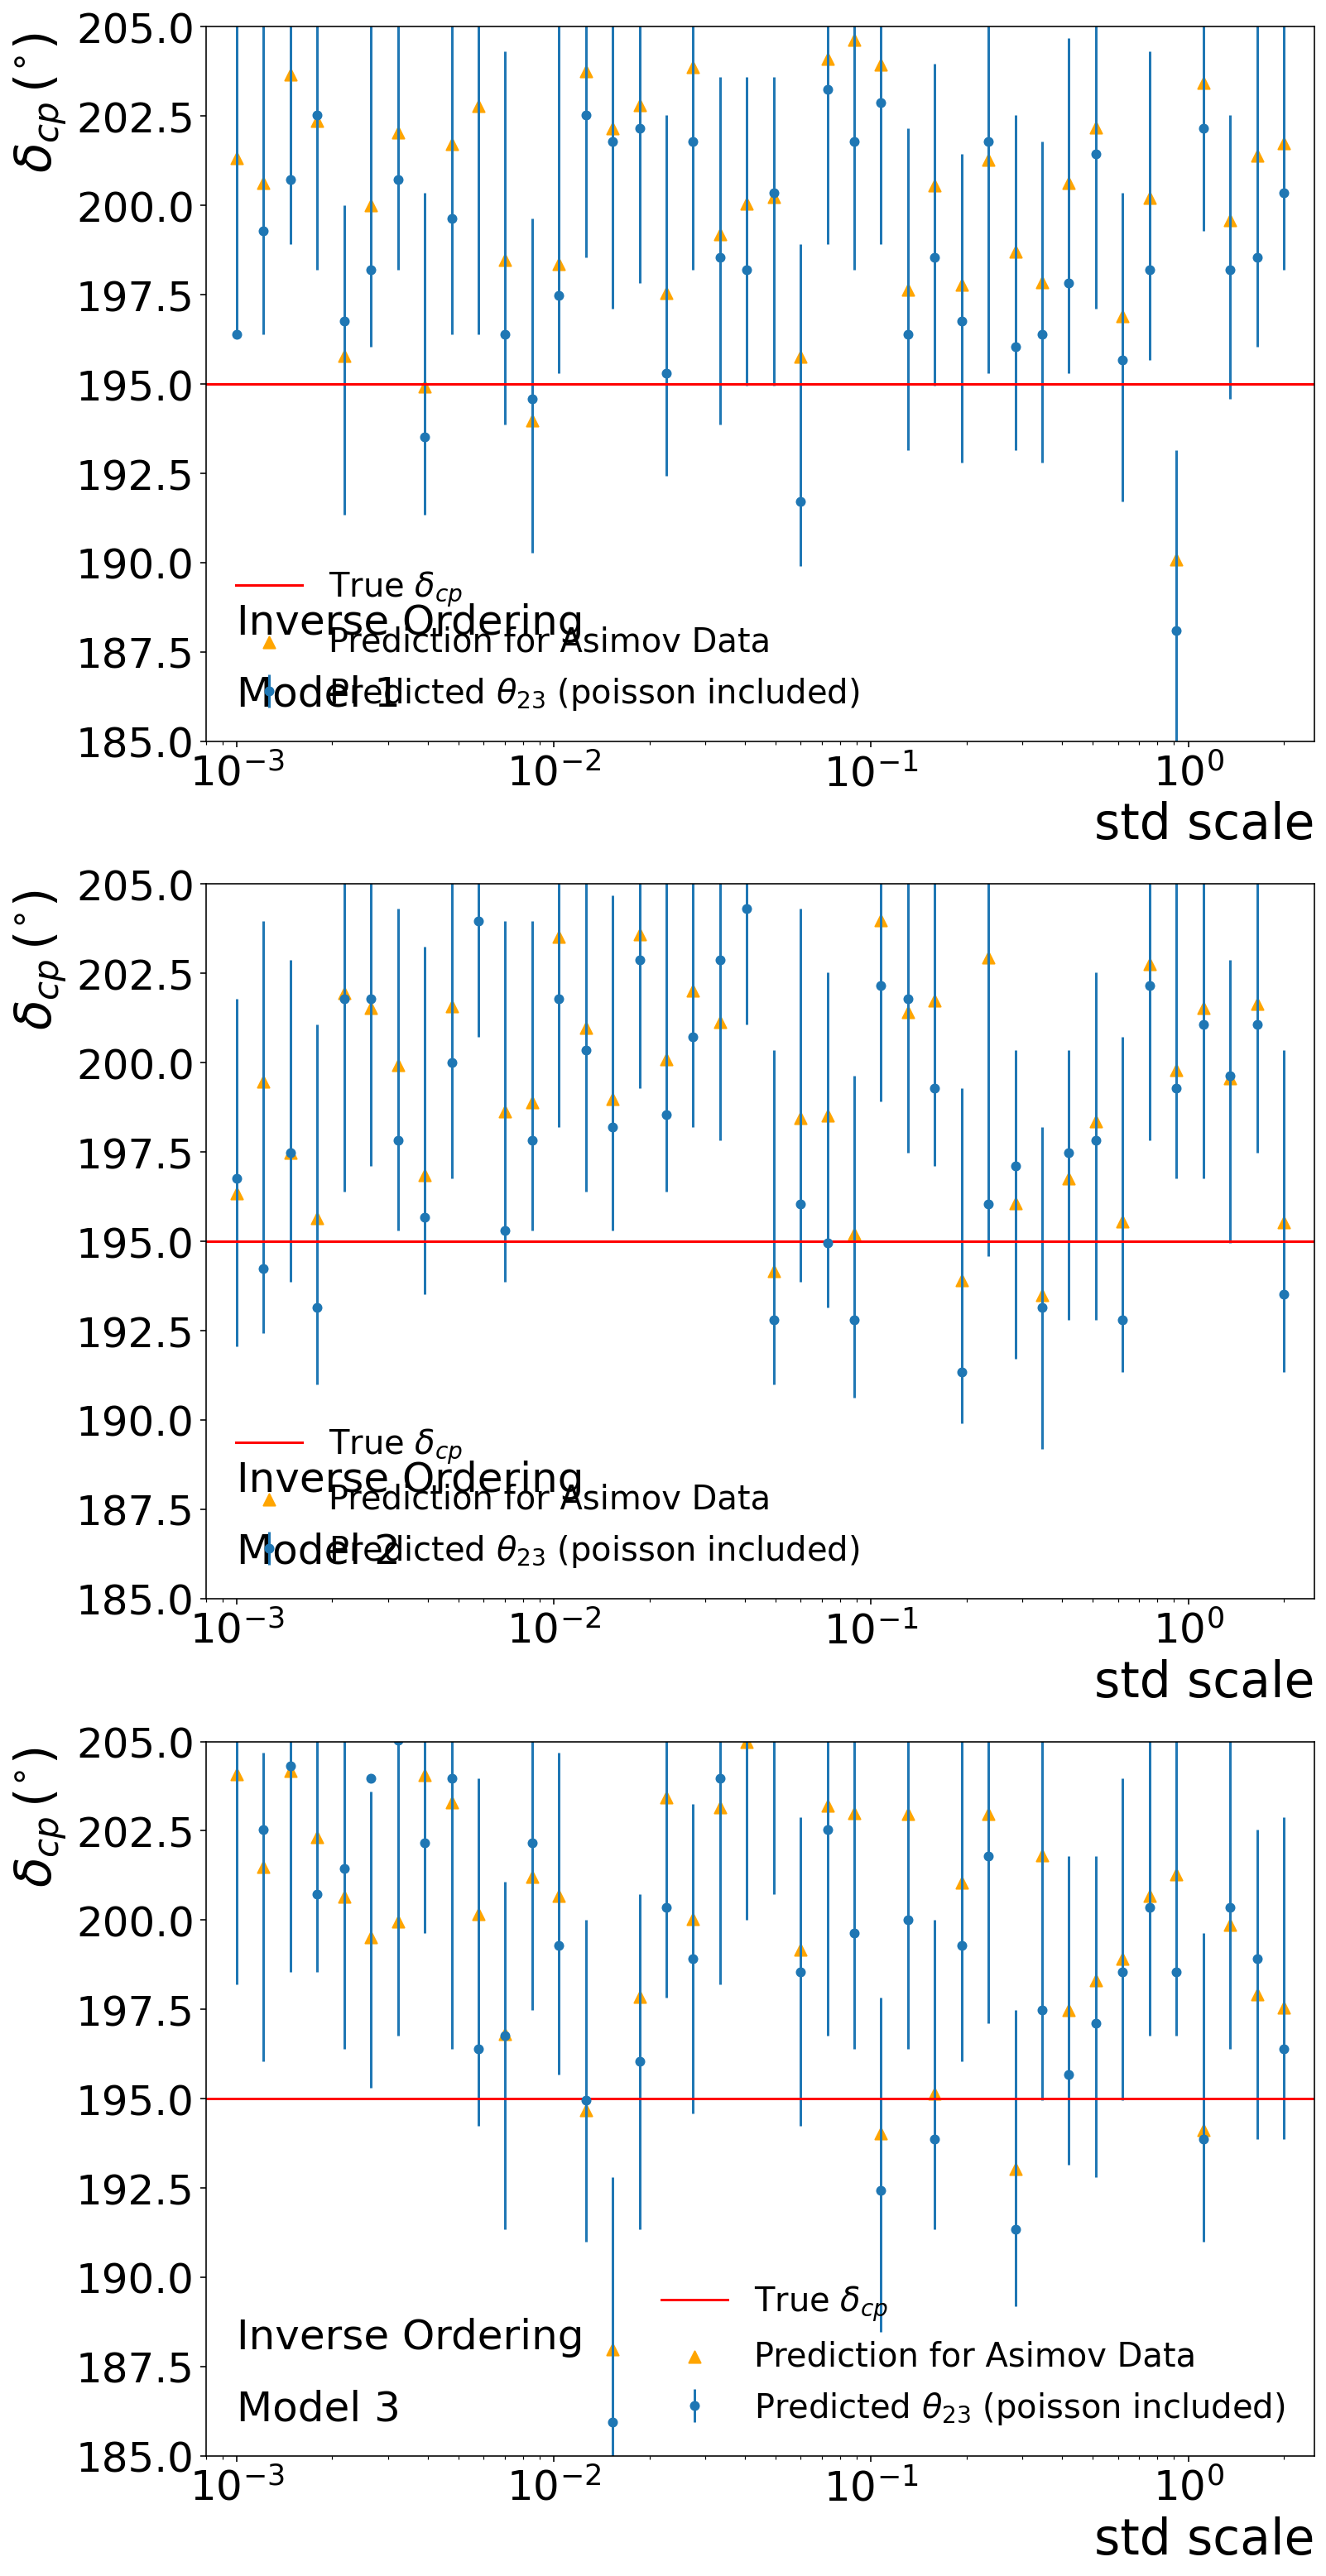

CPU times: user 1.36 s, sys: 259 ms, total: 1.62 s
Wall time: 1.39 s


In [18]:
%%time

fig, ax = plt.subplots(3,1, figsize=(12,27))

model_name = ["Model 1","Model 2","Model 3"]

for i, element in enumerate([delta_1_resolution, delta_2_resolution, delta_3_resolution]):
    
    std_scale = np.logspace(-3, np.log10(2), 40)[scale_range]
    prediction_asimov = [element[std_scale]["asimov"] for std_scale in element]
    best_fit = [element[std_scale]["best_fit"] for std_scale in element]
    p_yerr = np.array([element[std_scale]["p_yerr"] for std_scale in element]) - np.array(best_fit)
    n_yerr = np.array(best_fit) - np.array([element[std_scale]["n_yerr"] for std_scale in element])
    uncertainty = [n_yerr, p_yerr]

    ax[i].scatter(std_scale, prediction_asimov, color='orange', marker = "^", s=50, label="Prediction for Asimov Data")
    ax[i].errorbar(std_scale, best_fit, yerr=uncertainty, fmt='o',ms=5, label="Predicted $\\theta_{23}$ (poisson included)")
    ax[i].axhline(y=test_data['delta'][IO_or_NO] , color='r', linestyle='-', label="True $\delta_{cp}$")
    
    
    
    if IO_or_NO == 0:
        ax[i].text(x=0.001,y=188, s="Inverse Ordering", fontsize=25 )
        ax[i].text(x=0.001,y=186, s=model_name[i], fontsize=25 )
        ax[i].set_ylim((185, 205))
    elif IO_or_NO == 1:
        ax[i].text(x=0.001,y=248, s="Normal Ordering", fontsize=25 )
        ax[i].text(x=0.001,y=240, s=model_name[i], fontsize=25 )
        ax[i].set_ylim((236, 336))

    ax[i].tick_params(axis='x', labelsize=25)
    ax[i].tick_params(axis='y', labelsize=25)
    ax[i].set_xlim((0.0008, 2.5))
    ax[i].set_xscale("log")
    ax[i].set_xlabel("std scale", fontsize=30,horizontalalignment='right',x=1) 
    ax[i].set_ylabel("$\delta_{cp}\,(^{\circ})$ ", fontsize=30, horizontalalignment='right',y=1)

    ax[i].legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
 

    

plt.show()

In [19]:
# %%time
# fig, ax = plt.subplots(1,1, figsize=(12,9))

# # for i in scale_range[0,5,10,15,20,25,39]:
# for i in [0,5,10,15,20,25,39]:
#     hist, bins = theta23_resolution["std_scale_"+str(i)]["hist"], bins_theta23
    
#     plt.step(bins[:-1], 
#              hist.astype(np.float32) / hist.sum() ,
#     #          hist.astype(np.float32) ,
#              where='mid',
#              linewidth=2, 
#              alpha=0.7,
#              label="std scale: {:.4f}".format(np.logspace(-3, np.log10(2), 40)[i])
#             )
    
    
# plt.axvline(x=49.00 , color='r', linestyle='-', label="True $\\theta_{23}$")

# ax.tick_params(axis='x', labelsize=25)
# ax.tick_params(axis='y', labelsize=25)
# plt.xlim((46,52))
# # plt.ylim((0., 0.18))
# plt.xlabel("predicted $\\theta_{23}$ ($^\circ$)", fontsize=30,horizontalalignment='right',x=1) 
# plt.ylabel("1/N [dN/d$\\theta_{23}$ / ?? ($^\circ$)]", fontsize=30, horizontalalignment='right',y=1)

# plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
    


# plt.show()

In [20]:
# %%time
# fig, ax = plt.subplots(1,1, figsize=(12,9))

# # for i in scale_range[0,5,10,15,20,25,39]:
# for i in [0,5,10,15,20,25,39]:
#     hist, bins = delta_resolution["std_scale_"+str(i)]["hist"], bins_delta
#     plt.step(bins[:-1], 
#              hist.astype(np.float32) / hist.sum() ,
#     #          hist.astype(np.float32) ,
#              where='mid',
#              linewidth=2, 
#              alpha=0.7,
#              label="std scale: {:.4f}".format(np.logspace(-3, np.log10(2), 40)[i])
#             )

# plt.axvline(x=195.00 , color='r', linestyle='-', label="True $\delta_{cp}$")
    
# ax.tick_params(axis='x', labelsize=25)
# ax.tick_params(axis='y', labelsize=25)
# plt.xlim((150,250))
# # plt.ylim((0., 0.18))
# plt.xlabel("predicted $\delta_{cp}$ ($^\circ$)", fontsize=30,horizontalalignment='right',x=1) 
# plt.ylabel("1/N [dN/d$\delta_{cp}$ / ?? ($^\circ$)]", fontsize=30, horizontalalignment='right',y=1)

# plt.legend(loc="best",ncol=1,fontsize=20, edgecolor = "w",fancybox=False, framealpha=0)
    


# plt.show()

In [21]:
# #總資料組數
# N_DUNE = 92
# N_T2HK = 36
# N_DUT2 = 96

In [22]:
# theta23_DUNE = []
# delta_cp_DUNE = []
# chi_DUNE = []
# theta23_T2HK = []
# delta_cp_T2HK = []
# chi_T2HK = []
# theta23_DUT2 = []
# delta_cp_DUT2 = []
# chi_DUT2 = []

In [23]:
# %%time
# #Import txt檔
# f_DUNE = open("../Data/chi_square-4-2_figB_DUNE.txt")
# for i in range(N_DUNE):
#     s = f_DUNE.readline().split()
#     array = []
#     for j in range(len(s)) :
#         array.append(float(s[j])) 
#     theta23_DUNE.append(array[0])
#     delta_cp_DUNE.append(array[1]) 
#     chi_DUNE.append(array[2])
# f_DUNE.close()
# f_T2HK = open("../Data/chi_square-4-2_figB_T2HK.txt")
# for i in range(N_T2HK):
#     s = f_T2HK.readline().split()
#     array = []
#     for j in range(len(s)) :
#         array.append(float(s[j])) 
#     theta23_T2HK.append(array[0])
#     delta_cp_T2HK.append(array[1]) 
#     chi_T2HK.append(array[2])
# f_T2HK.close()
# f_DUT2 = open("../Data/chi_square-4-2_figB_DUT2.txt")
# for i in range(N_DUT2):
#     s = f_DUT2.readline().split()
#     array = []
#     for j in range(len(s)) :
#         array.append(float(s[j])) 
#     theta23_DUT2.append(array[0])
#     delta_cp_DUT2.append(array[1]) 
#     chi_DUT2.append(array[2])
# f_DUT2.close()

In [24]:
# theta23_DUNE = np.array(theta23_DUNE)
# delta_cp_DUNE = np.array(delta_cp_DUNE)
# chi_DUNE = np.array(chi_DUNE)
# theta23_T2HK = np.array(theta23_T2HK)
# delta_cp_T2HK = np.array(delta_cp_T2HK)
# chi_T2HK = np.array(chi_T2HK)
# theta23_DUT2 = np.array(theta23_DUT2)
# delta_cp_DUT2 = np.array(delta_cp_DUT2)
# chi_DUT2 = np.array(chi_DUT2)

In [25]:
# %%time
# x0 = np.linspace(min(theta23_DUNE)-3, max(theta23_DUNE)+3, 68)
# y0 = np.linspace(min(delta_cp_DUNE)-6, max(delta_cp_DUNE)+6, 20)
# X0, Y0 = np.meshgrid(x0, y0)
# Z0 = np.zeros((len(X0),len(X0[0])))

# for i in range(len(theta23_DUNE)):
#     a = np.where(X0 == theta23_DUNE[i])[1][0]
#     b = np.where(Y0 == delta_cp_DUNE[i])[0][0]
#     Z0[b][a] = 1

# x1 = np.linspace(min(theta23_T2HK)-3, max(theta23_T2HK)+3, 65)
# y1 = np.linspace(min(delta_cp_T2HK)-6, max(delta_cp_T2HK)+6, 14)
# X1, Y1 = np.meshgrid(x1, y1)
# Z1 = np.zeros((len(X1),len(X1[0])))

# for i in range(len(theta23_T2HK)):
#     a = np.where(X1 == theta23_T2HK[i])[1][0]
#     b = np.where(Y1 == delta_cp_T2HK[i])[0][0]
#     Z1[b][a] = 1

# x2 = np.linspace(min(theta23_DUT2)-3, max(theta23_DUT2)+3, 129)
# y2 = np.linspace(min(delta_cp_DUT2)-6, max(delta_cp_DUT2)+6, 25)
# X2, Y2 = np.meshgrid(x2, y2)
# Z2 = np.zeros((len(X2),len(X2[0])))

# for i in range(len(theta23_DUT2)):
#     a = np.where(X2 == theta23_DUT2[i])[1][0]
#     b = np.where(Y2 == delta_cp_DUT2[i])[0][0]
#     Z2[b][a] = 1

In [26]:
# %%time

# index = 39
# input_theta23 = theta23_resolution["std_scale_"+str(index)]["poission_prediction"]
# input_delta = delta_resolution["std_scale_"+str(index)]["poission_prediction"]




# bins_theta23_globes = np.linspace(0, 360, int(360/(x0[1]-x0[0])))
# bins_delta_globes  = np.linspace(0, 360, int(360/(y0[1]-y0[0])))

# likeliregion, xedges, yedges = np.histogram2d(input_theta23, input_delta, 
#                                               bins = [bins_theta23_globes, bins_delta_globes]
#                                              )
# likeliregion = likeliregion.T

# max_poi = np.where(likeliregion == likeliregion.max())
# logging.info("Maximum: theta23: {:.2f}, delta: {:.2f} ".format(xedges[max_poi[1]][0],yedges[max_poi[0]][0]))
# sorted_list = np.sort(likeliregion.reshape((len(xedges)-1)*(len(yedges)-1)))[::-1]

# tot_event_num = sorted_list.sum()

# onesigma = 0
# for i in range(len(sorted_list)):
#     onesigma += sorted_list[i]
#     if onesigma/tot_event_num >= 0.68:
#         one_sigma_num = sorted_list[i]
#         break
        
# twosigma = 0
# for i in range(len(sorted_list)):
#     twosigma += sorted_list[i]        
#     if twosigma/tot_event_num >= 0.95:
#         two_sigma_num = sorted_list[i]
#         break

# one_sigma_region = np.where(likeliregion < one_sigma_num, 0, likeliregion )
# one_sigma_region_boundary = np.where(one_sigma_region > 0, 1, one_sigma_region )
# one_sigma_allowed_region = np.where(one_sigma_region_boundary != 0)

# two_sigma_region = np.where(likeliregion < two_sigma_num, 0, likeliregion )
# two_sigma_region_boundary = np.where(two_sigma_region > 0, 1, two_sigma_region )
# two_sigma_allowed_region = np.where(two_sigma_region_boundary != 0)

# xaxis, yaxis = (xedges[:-1] + xedges[1:])/2, (yedges[:-1] + yedges[1:])/2

In [27]:
# fig, ax = plt.subplots(1,1, figsize=(15,15))

# #=========================== Upper Left Corner
# plot_axis = plt.subplot(2,2,1)
# """
# ML
# """
# plot_axis.hist(input_theta23,density=1,bins=bins_theta23_globes)
# plot_axis.set_xlim((44,54))
# plot_axis.tick_params(axis='x', labelsize=25)
# plot_axis.tick_params(axis='y', labelsize=25)
# plot_axis.set_ylabel(r'density', fontsize=30)
# #===========================




# #=========================== Down Right Corner
# plot_axis = plt.subplot(2,2,4)
# """
# ML
# """
# plot_axis.hist(input_delta,orientation="horizontal",density=1, bins=bins_delta_globes)
# plot_axis.set_ylim((150,250))
# plot_axis.tick_params(axis='x', labelsize=25)
# plot_axis.tick_params(axis='y', labelsize=25)
# plot_axis.set_xlabel(r'density', fontsize=30)
# #===========================


# #=========================== Down Left Corner
# plot_axis = plt.subplot(2,2,3)

# """
# globes
# """
# DUT2 = plot_axis.contour(X0, Y0, Z0, 0, colors='green', linestyles="--", linewidths=1 )
# DUT2.collections[0].set_label("DUNE (1$\sigma$)")

# # DUT2 = plot_axis.contour(X1, Y1, Z1, 0, colors='blue', linestyles="-", linewidths=1)
# # DUT2.collections[0].set_label("T2HK")

# # DUT2 = plot_axis.contour(X2, Y2, Z2, 0, colors='blue', linestyles="-", linewidths=1)
# # DUT2.collections[0].set_label("DUNE + T2HK")

# """
# ML
# """
# CS_1_sigma = plt.contour(xaxis, yaxis, one_sigma_region_boundary, 0, colors='green', linestyles="-", linewidths=1)
# CS_2_sigma = plt.contour(xaxis, yaxis, two_sigma_region_boundary, 0, colors='red', linestyles="-", linewidths=1)
# CS_1_sigma.collections[0].set_label("1$\sigma$")
# CS_2_sigma.collections[0].set_label("2$\sigma$")
# plot_axis.scatter(xedges[max_poi[1]],yedges[max_poi[0]], c="r", s=5, label = "maximum point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(xedges[max_poi[1]][0], yedges[max_poi[0]][0]))

# if IO_or_NO == 0:
#     plot_axis.scatter(test_data['theta23'][0], test_data['delta'][0], c="k", s=5, label = "true point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(test_data['theta23'][0], test_data['delta'][0]))
# else:
#     plot_axis.scatter(test_data['theta23'][1], test_data['delta'][1], c="k", s=5, label = "true point: $\\theta_{23}$=%.2f $\delta_{cp}$=%.2f" %(test_data['theta23'][1], test_data['delta'][1]))



# plot_axis.set_xlabel(r'$\theta_{23} $($^\circ$)', fontsize=30)
# plot_axis.set_ylabel(r'$\delta_{cp} $($^\circ$)', fontsize=30)
# plot_axis.set_ylim((150,250))
# plot_axis.set_xlim((44,54))
# plot_axis.tick_params(axis='x', labelsize=25)
# plot_axis.tick_params(axis='y', labelsize=25)
# #===========================
                              
                              

# #=========================== Whole Figure Setting

# plt.text(x=54.5,y=350, s="std scale to " + str(round(np.logspace(-3, np.log10(2), 40)[index],2)), fontsize=25 )
# # plt.subplots_adjust(wspace=0.15, hspace=0.01)
# plt.legend(bbox_to_anchor=(2.3, 1.7), ncol=1,fontsize=20, markerscale=4, edgecolor = "w",fancybox=False, framealpha=0)
# # plt.savefig("./Plots/dune.pdf", transparent=True, bbox_inches='tight') 
# plt.show()